# importing libraries

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam , RMSprop , Adagrad , Adamax , SGD
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D ,Input, Lambda
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob
from tensorflow.keras.regularizers import l2 , l1
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
import matplotlib.image as img
from IPython.display import Image as IPyImage
from PIL import Image
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, 
recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve,
plot_precision_recall_curve, average_precision_score)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils 
from sklearn.model_selection import train_test_split
from numpy import interp

: 

# Loading dataset

## Defining a fuction for loading images ... 

In [3]:
IMM_SIZE = 255

In [4]:
def load_data(folder):
    class_names = [f for f in os.listdir(folder) if not f.startswith('.')] # ctreate a list of SubFolders

    data = []
    print(class_names)
    for t, f in enumerate(class_names):
        images = glob(folder + "/" + f + "/*")
        print("loading: ", f)
        fig = plt.figure(figsize = (50,50)) 
        for im_n, im in enumerate(images):
            plt.gray() 
            image = cv2.imread(im)
            if len(image.shape) > 2:
                image = cv2.resize(image, (IMM_SIZE, IMM_SIZE), interpolation = cv2.INTER_LINEAR) 
            else:
                image = cv2.resize(image, (IMM_SIZE, IMM_SIZE))
            if len(image.shape) > 2:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                image.flatten()
                                           
            data.append([image, f])
        

    return np.array(data) 

In [5]:
data_path='C:/Users/Iman/Desktop/dataset/data'

In [6]:
data = load_data(data_path)

['adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib', 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa', 'normal', 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa']
loading:  adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib
loading:  large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
loading:  normal
loading:  squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa


C:\Users\Iman\Anaconda3\envs\tf2.8\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

<Figure size 5000x5000 with 0 Axes>

C:\Users\Iman\Anaconda3\envs\tf2.8\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


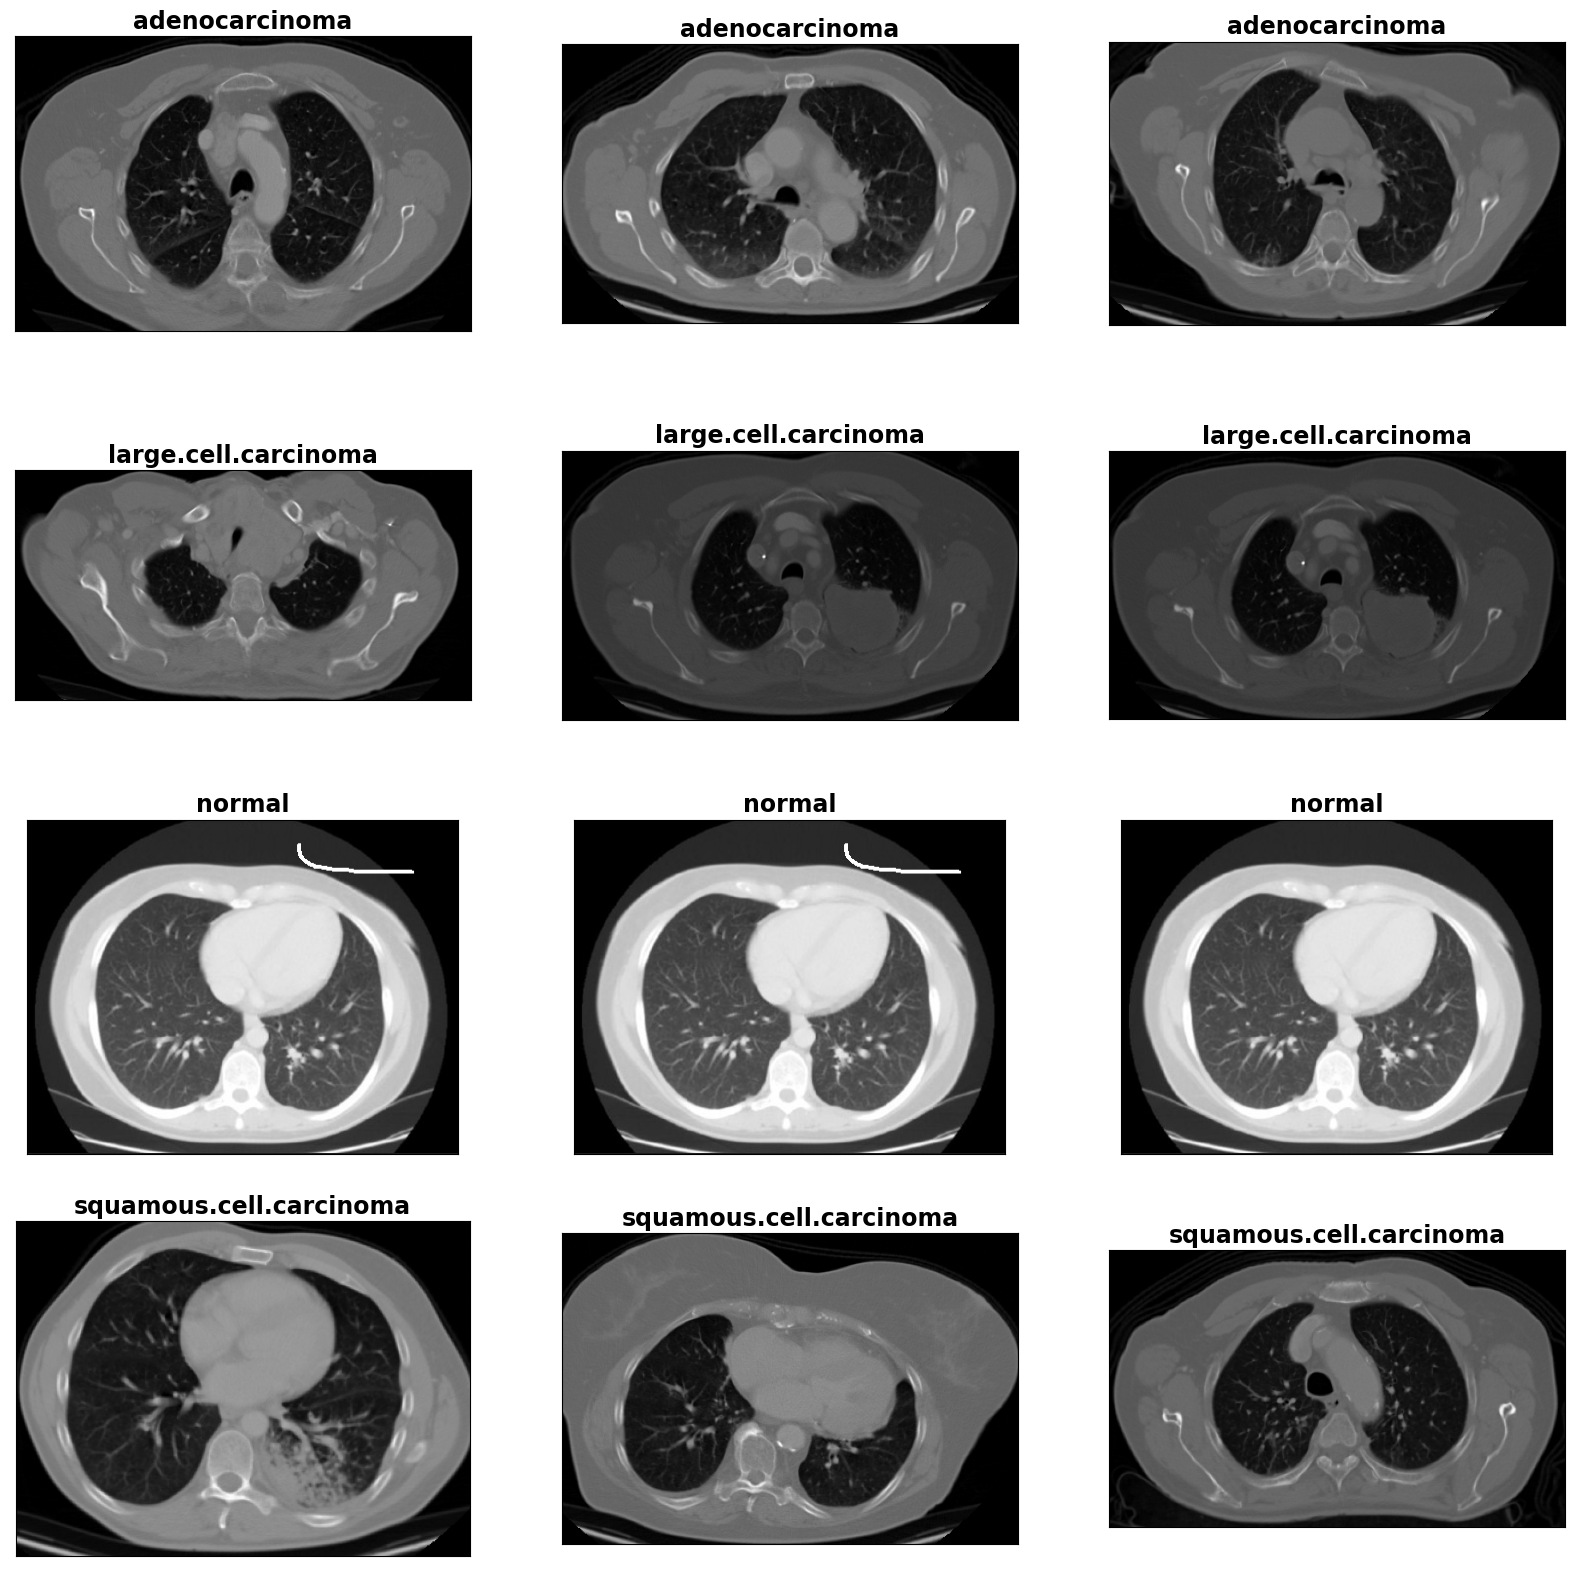

In [82]:
fig, ax = plt.subplots(4,3,figsize=(4*5,4*5))

for i in range(3):
    path=f"C:/Users/Iman/Desktop/show/new/0{i+1}.png"
    image=img.imread(path)
    ax[0][i].imshow(image)
    ax[0][i].axes.xaxis.set_visible(False)
    ax[0][i].axes.yaxis.set_visible(False)
    ax[0][i].set_title('adenocarcinoma',fontweight="bold",size=17)
for i in range(3):
    path=f"C:/Users/Iman/Desktop/show/New folder (2)/0{i+1}.png"
    image=img.imread(path)
    ax[1][i].imshow(image)
    ax[1][i].axes.xaxis.set_visible(False)
    ax[1][i].axes.yaxis.set_visible(False)
    ax[1][i].set_title('large.cell.carcinoma',fontweight="bold",size=17)
    
for i in range(3):
    path=f"C:/Users/Iman/Desktop/show/New folder (3)/0{i+1}.png"
    image=img.imread(path)
    ax[2][i].imshow(image)
    ax[2][i].axes.xaxis.set_visible(False)
    ax[2][i].axes.yaxis.set_visible(False)
    ax[2][i].set_title('normal',fontweight="bold",size=17)

for i in range(3):
    path=f"C:/Users/Iman/Desktop/show/New folder (4)/0{i+1}.png"
    image=img.imread(path)
    ax[3][i].imshow(image)
    ax[3][i].axes.xaxis.set_visible(False)
    ax[3][i].axes.yaxis.set_visible(False)
    ax[3][i].set_title('squamous.cell.carcinoma',fontweight="bold",size=17)    
fig.show()

# Preprocessing

## Segregation between images and labels 

In [7]:
images = []
labels = []


for feature, label in data:
    images.append(feature)
    labels.append(label)

#min_max normalization
images = np.array(images) / 255.0

# Resizing input images
images = images.reshape(-1, IMM_SIZE, IMM_SIZE, 1)

# Creating a dictionary of clases
lab = {}
for i, l in enumerate(set(labels)):
    lab[l] = i


labels = np.array([lab[l] for l in labels])

In [8]:
print("Shape of the input DataSet:", images.shape)
print("Shape of the output DataSet:", labels.shape)
print("Dictionary of classes:", lab)

Shape of the input DataSet: (900, 255, 255, 1)
Shape of the output DataSet: (900,)
Dictionary of classes: {'normal': 0, 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 1, 'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 2, 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 3}


## Encodind labels

In [9]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_Y = encoder.transform(labels)
dummy_Y = np_utils.to_categorical(encoded_Y)
dummy_Y.astype(int)

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

## Train_Test_Validation Split 

In [10]:
train_dataset, test_dataset, train_label, test_label = train_test_split(images, dummy_Y, test_size = .3)

In [11]:
test_dataset, validation_dataset, test_label, validation_label = train_test_split(test_dataset, test_label, test_size = .3)

In [12]:
print('train_d :' , train_dataset.shape)
print('test_shape :' , test_dataset.shape)
print('validation_shape :' , validation_dataset.shape)

train_d : (630, 255, 255, 1)
test_shape : (189, 255, 255, 1)
validation_shape : (81, 255, 255, 1)


# building CNN models

## CNN model (1)

In [13]:
CNN_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(255, 255, 1)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3) , padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
  

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),

   

  
])

In [14]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [15]:

CNN_model_1.compile(optimizer='adam', loss='categorical_crossentropy', 
                    metrics=['accuracy'] )

In [16]:
 round(CNN_model_1.optimizer.lr.numpy(), 5)


0.001

In [17]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [19]:
history = CNN_model_1.fit(train_dataset, train_label,
            epochs = 50,
            batch_size=16,               
            validation_data = (validation_dataset , validation_label), callbacks=[callback])

Epoch 1/50
40/40 [==============================] - 15s 355ms/step - loss: 1.0602 - accuracy: 0.5000 - val_loss: 0.9851 - val_accuracy: 0.5185 - lr: 0.0010
Epoch 2/50
40/40 [==============================] - 20s 506ms/step - loss: 0.8770 - accuracy: 0.6063 - val_loss: 0.9123 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 3/50
40/40 [==============================] - 26s 649ms/step - loss: 0.6257 - accuracy: 0.7571 - val_loss: 0.7695 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 4/50
40/40 [==============================] - 27s 675ms/step - loss: 0.4734 - accuracy: 0.8206 - val_loss: 0.8031 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 5/50
40/40 [==============================] - 28s 687ms/step - loss: 0.4475 - accuracy: 0.8286 - val_loss: 0.7149 - val_accuracy: 0.7284 - lr: 0.0010
Epoch 6/50
40/40 [==============================] - 27s 681ms/step - loss: 0.2715 - accuracy: 0.8889 - val_loss: 0.6802 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 7/50
40/40 [==============================] - 28s 712ms/st

In [71]:
CNN_model_1.save('C:/Users/Iman/Desktop/CNN1')

INFO:tensorflow:Assets written to: C:/Users/Iman/Desktop/CNN1\assets


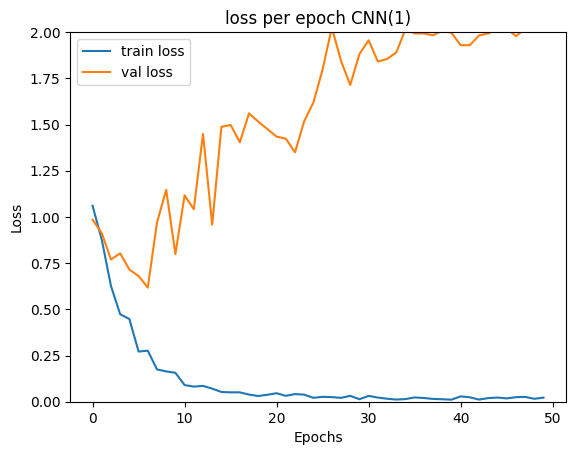

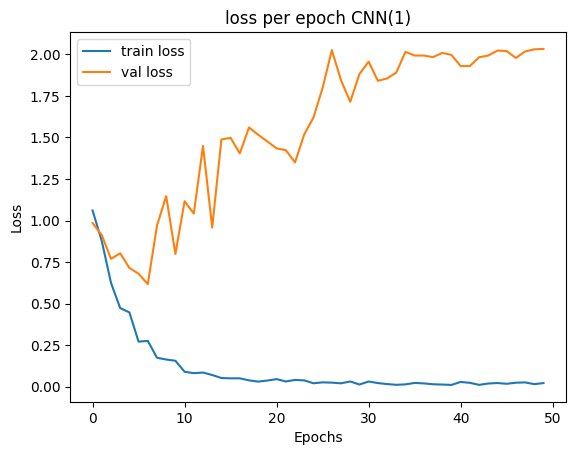

In [20]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylim(0, 2)
plt.title('loss per epoch CNN(1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch for CNN(1)' , dpi=100)
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss per epoch CNN(1)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch for CNN(1)' , dpi=100)
plt.show()

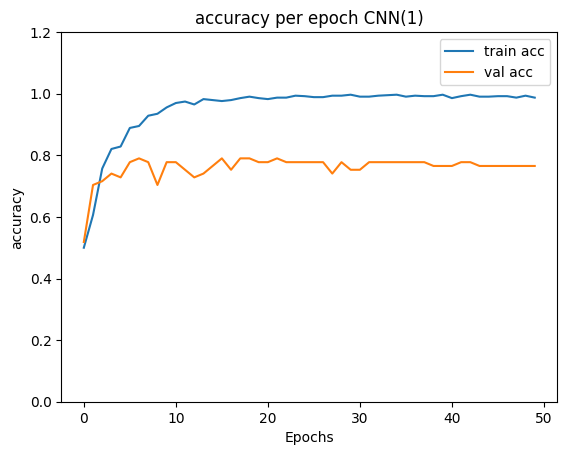

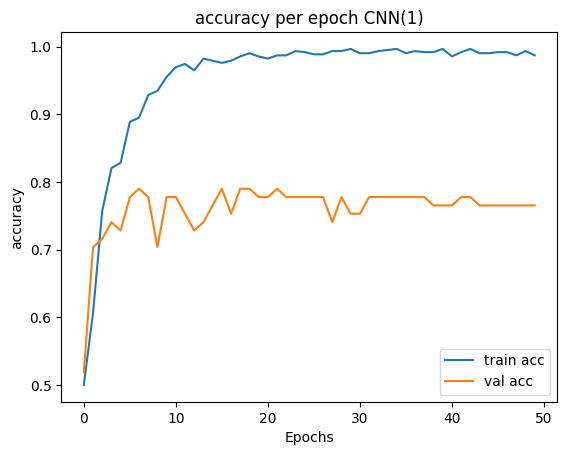

In [21]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc'  )
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN(1)')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy per epoch for CNN(1)' , dpi=100)
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc'  )
plt.title('accuracy per epoch CNN(1)')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy per epoch for CNN(1)' , dpi=100)
plt.show()

In [22]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [23]:
ypred1 = CNN_model_1.predict(test_dataset , batch_size=16)
ypred_classes1 = np.argmax(ypred1, axis=1)
pred_label1 = np.argmax(CNN_model_1.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

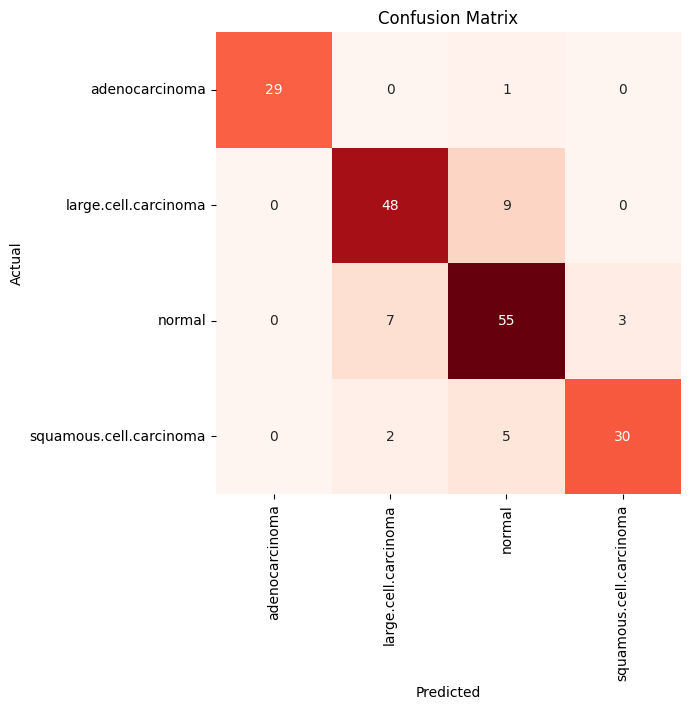

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     1.0000    0.9667    0.9831        30
   large.cell.carcinoma     0.8421    0.8421    0.8421        57
                 normal     0.7857    0.8462    0.8148        65
squamous.cell.carcinoma     0.9091    0.8108    0.8571        37

               accuracy                         0.8571       189
              macro avg     0.8842    0.8664    0.8743       189
           weighted avg     0.8609    0.8571    0.8580       189



In [24]:
cm = confusion_matrix(true_label, pred_label1 )
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label1, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [28]:
n_classes = 4 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], ypred1[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["adenocarcinoma"], tpr["adenocarcinoma"], _ = roc_curve(test_label.ravel(), ypred1.ravel())
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

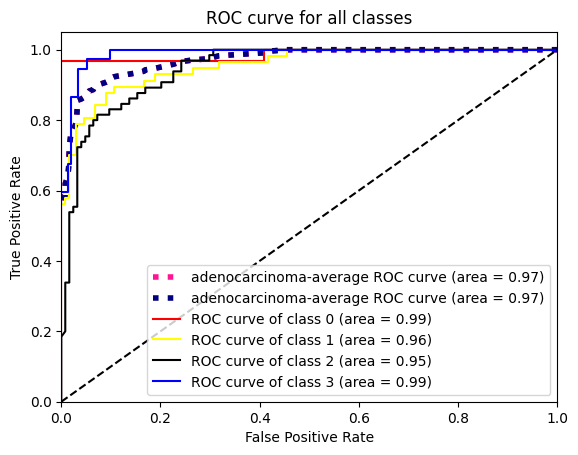

In [37]:
from itertools import cycle
lw = 1.5
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["adenocarcinoma"] = all_fpr
tpr["adenocarcinoma"] = mean_tpr
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'yellow', 'black' , 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes')
plt.legend(loc='lower right')
plt.show()

## CNN model (2)

In [12]:
CNN_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(255, 255, 1)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    
  

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),

   

  
])

In [13]:

CNN_model_2.compile(optimizer=Adam(learning_rate=0.0001) , loss='categorical_crossentropy', metrics=['accuracy'])


In [30]:
CNN_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 64)       256       
 ormalization)                                                   
                                                        

In [14]:
history2 = CNN_model_2.fit(train_dataset, train_label,
            epochs = 50,
            batch_size=16,               
            validation_data = (validation_dataset , validation_label))

Epoch 1/50
40/40 [==============================] - 24s 522ms/step - loss: 1.1808 - accuracy: 0.4683 - val_loss: 1.3173 - val_accuracy: 0.3951
Epoch 2/50
40/40 [==============================] - 30s 750ms/step - loss: 0.7867 - accuracy: 0.6397 - val_loss: 1.2619 - val_accuracy: 0.6420
Epoch 3/50
40/40 [==============================] - 34s 848ms/step - loss: 0.6084 - accuracy: 0.7365 - val_loss: 1.2331 - val_accuracy: 0.7407
Epoch 4/50
40/40 [==============================] - 32s 803ms/step - loss: 0.4408 - accuracy: 0.8238 - val_loss: 1.1065 - val_accuracy: 0.7284
Epoch 5/50
40/40 [==============================] - 35s 876ms/step - loss: 0.3320 - accuracy: 0.8810 - val_loss: 1.0259 - val_accuracy: 0.7654
Epoch 6/50
40/40 [==============================] - 37s 925ms/step - loss: 0.2955 - accuracy: 0.8794 - val_loss: 0.9328 - val_accuracy: 0.8272
Epoch 7/50
40/40 [==============================] - 37s 921ms/step - loss: 0.2178 - accuracy: 0.9270 - val_loss: 0.7976 - val_accuracy: 0.8148

In [74]:
CNN_model_2.save('C:/Users/Iman/Desktop/CNN2')

INFO:tensorflow:Assets written to: C:/Users/Iman/Desktop/CNN2\assets


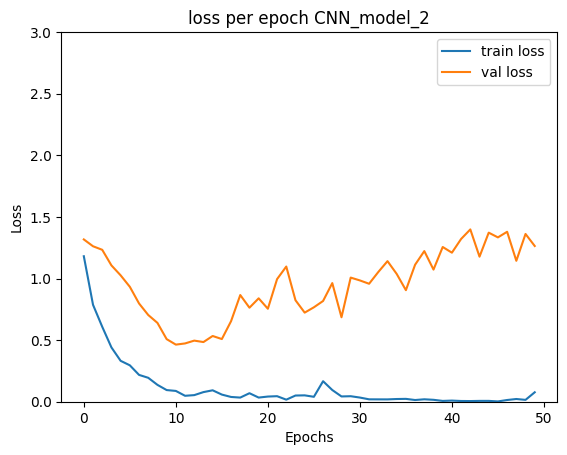

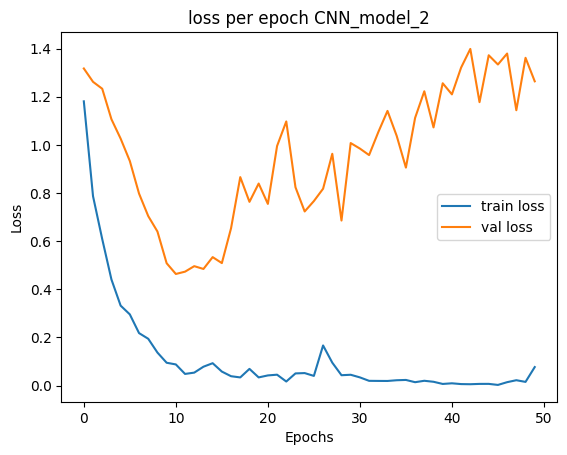

In [15]:
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.ylim(0, 3)
plt.title('loss per epoch CNN_model_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch for CNN_model_2' , dpi=100)
plt.show()

plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('loss per epoch CNN_model_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch for CNN_model_2' , dpi=100)
plt.show()

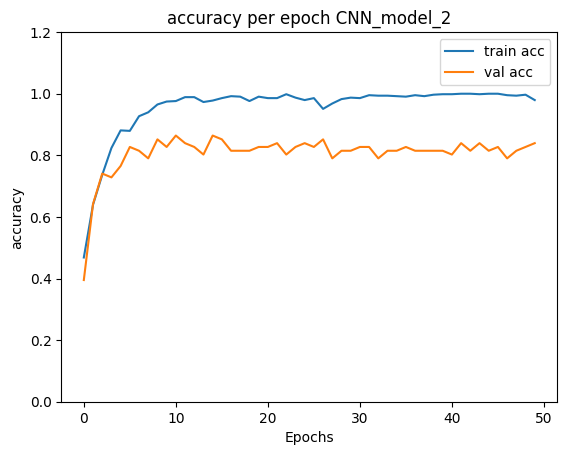

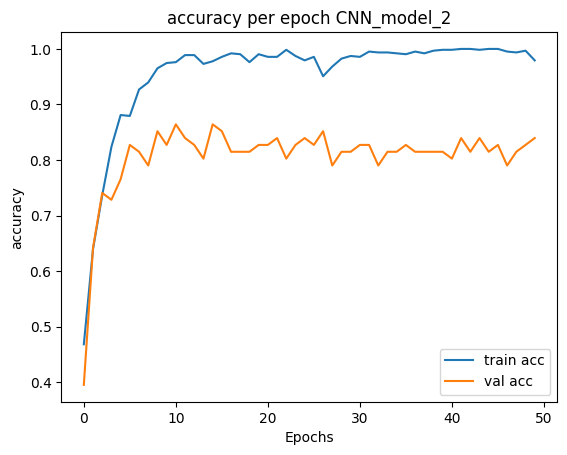

In [16]:
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN_model_2')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy per epoch for CNN_model_2' , dpi=100)
plt.show()

plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.title('accuracy per epoch CNN_model_2')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy per epoch for CNN_model_2' , dpi=100)
plt.show()

In [41]:
from tensorflow import keras

CNN_model_2 = keras.models.load_model('C:/Users/Iman/Desktop/CNN2')

In [17]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [42]:
ypred2 = CNN_model_2.predict(test_dataset , batch_size=16)
ypred_classes2 = np.argmax(ypred2, axis=1)
pred_label2 = np.argmax(CNN_model_2.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

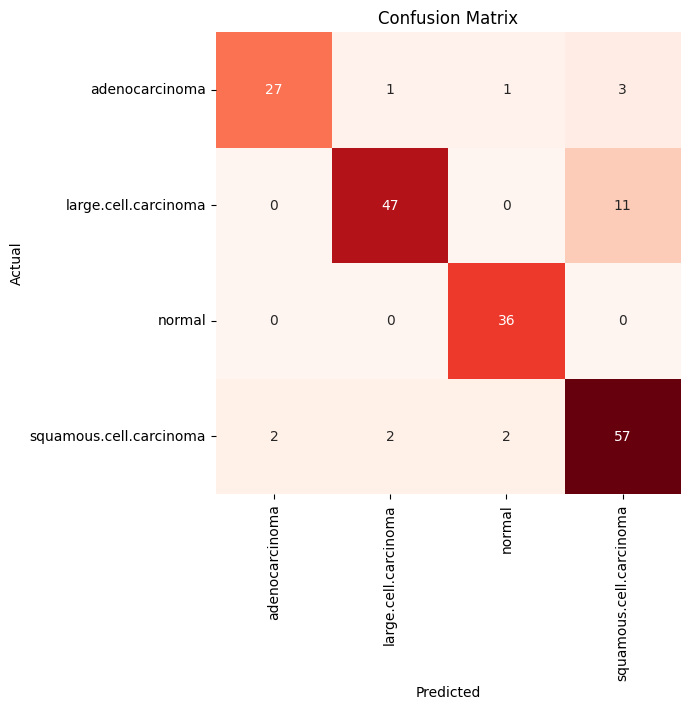

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.9310    0.8438    0.8852        32
   large.cell.carcinoma     0.9400    0.8103    0.8704        58
                 normal     0.9231    1.0000    0.9600        36
squamous.cell.carcinoma     0.8028    0.9048    0.8507        63

               accuracy                         0.8836       189
              macro avg     0.8992    0.8897    0.8916       189
           weighted avg     0.8895    0.8836    0.8834       189



In [41]:
cm = confusion_matrix(true_label, pred_label2 )
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label2, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

## CNN model (3)

In [31]:
CNN_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(255, 255, 1)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
 
    
    tf.keras.layers.Conv2D(256,(3,3) ,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.5),
  

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax' ,kernel_regularizer=tf.keras.regularizers.l2(0.01) ),

   

  
])

In [32]:
CNN_model_3.compile(optimizer=Adam(0.00011) , loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
CNN_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 128)     

In [34]:
history3 = CNN_model_3.fit(train_dataset, train_label,
            epochs = 50,
            batch_size=16,               
            validation_data = (validation_dataset , validation_label))

Epoch 1/50
40/40 [==============================] - 17s 406ms/step - loss: 1.4058 - accuracy: 0.3714 - val_loss: 1.2836 - val_accuracy: 0.4074
Epoch 2/50
40/40 [==============================] - 27s 683ms/step - loss: 1.2097 - accuracy: 0.4889 - val_loss: 1.0141 - val_accuracy: 0.5679
Epoch 3/50
40/40 [==============================] - 33s 818ms/step - loss: 0.9982 - accuracy: 0.6175 - val_loss: 0.8611 - val_accuracy: 0.7407
Epoch 4/50
40/40 [==============================] - 34s 849ms/step - loss: 0.8446 - accuracy: 0.6810 - val_loss: 0.7293 - val_accuracy: 0.7654
Epoch 5/50
40/40 [==============================] - 36s 898ms/step - loss: 0.7230 - accuracy: 0.7349 - val_loss: 0.7439 - val_accuracy: 0.7284
Epoch 6/50
40/40 [==============================] - 39s 969ms/step - loss: 0.6130 - accuracy: 0.7651 - val_loss: 0.6372 - val_accuracy: 0.7407
Epoch 7/50
40/40 [==============================] - 39s 985ms/step - loss: 0.5764 - accuracy: 0.7984 - val_loss: 0.6292 - val_accuracy: 0.7901

In [75]:
CNN_model_3.save('C:/Users/Iman/Desktop/CNN3')

INFO:tensorflow:Assets written to: C:/Users/Iman/Desktop/CNN3\assets


In [45]:
CNN_model_3 = keras.models.load_model('C:/Users/Iman/Desktop/CNN3')

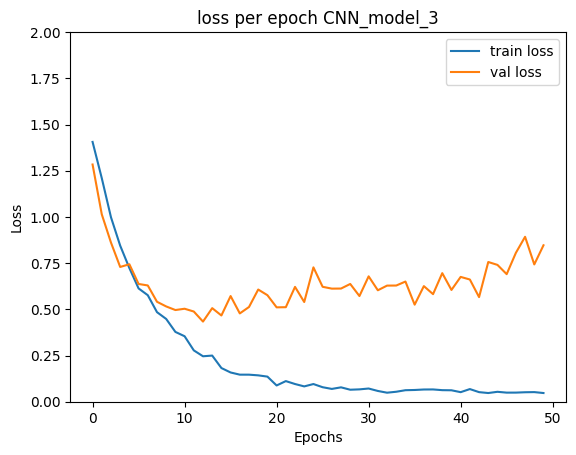

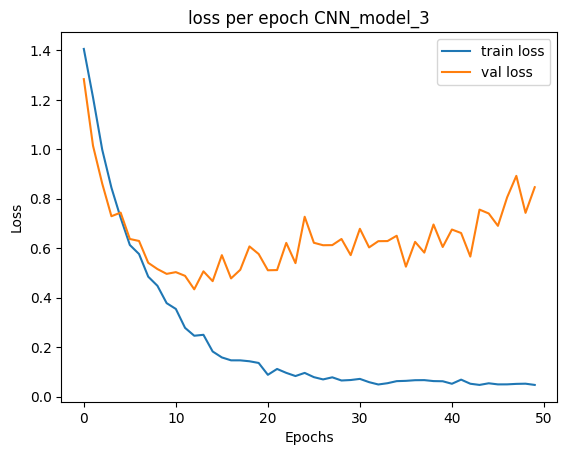

In [35]:
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.ylim(0, 2)
plt.title('loss per epoch CNN_model_3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('loss per epoch for CNN_model_3' , dpi=100)
plt.show()

plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title('loss per epoch CNN_model_3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('loss per epoch for CNN_model_3' , dpi=100)
plt.show()

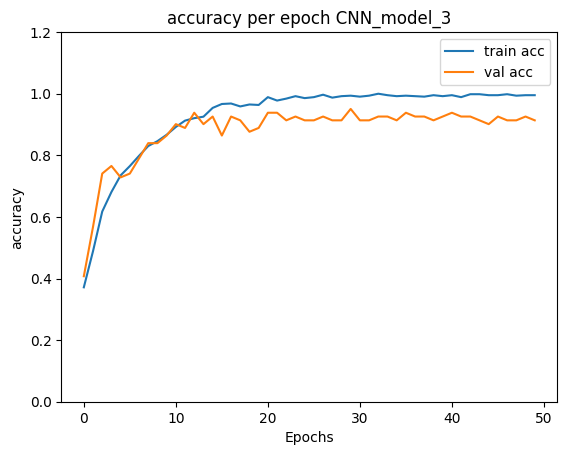

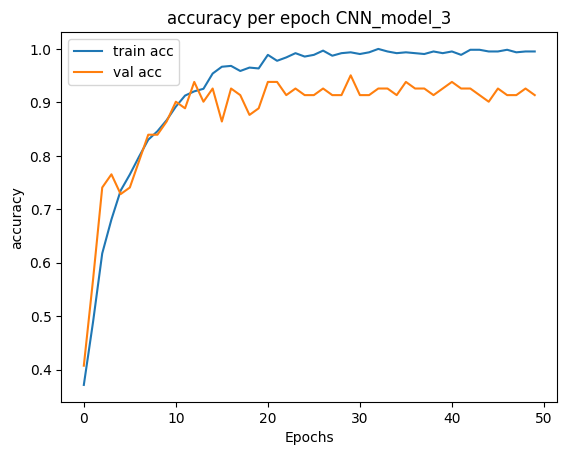

In [36]:
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN_model_3')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch for CNN_model_3' , dpi=100)
plt.show()

plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.title('accuracy per epoch CNN_model_3')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch for CNN_model_3' , dpi=100)
plt.show()

In [37]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [47]:
ypred3 = CNN_model_3.predict(test_dataset , batch_size=16)
ypred_classes3 = np.argmax(ypred3, axis=1)
pred_label3 = np.argmax(CNN_model_3.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

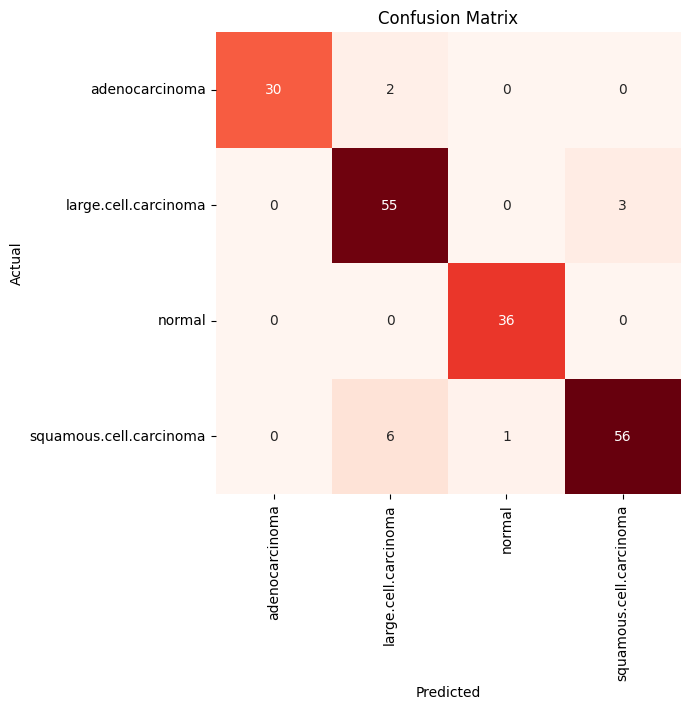

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     1.0000    0.9375    0.9677        32
   large.cell.carcinoma     0.8730    0.9483    0.9091        58
                 normal     0.9730    1.0000    0.9863        36
squamous.cell.carcinoma     0.9492    0.8889    0.9180        63

               accuracy                         0.9365       189
              macro avg     0.9488    0.9437    0.9453       189
           weighted avg     0.9389    0.9365    0.9367       189



In [39]:
cm = confusion_matrix(true_label, pred_label3 )
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label3, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

## CNN_model (4)

In [42]:
CNN_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,activation='relu',padding='same', input_shape=(255, 255, 1)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    
    
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
  

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax' ),

   

  
])

In [43]:
CNN_model_4.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
CNN_model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 127, 127, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_8 (Conv2D)           (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                      

In [45]:
history4 = CNN_model_4.fit(train_dataset, train_label,
            epochs = 50,
            batch_size=16,               
            validation_data = (validation_dataset , validation_label))

Epoch 1/50
40/40 [==============================] - 18s 430ms/step - loss: 7.0163 - accuracy: 0.5683 - val_loss: 3.9885 - val_accuracy: 0.2222
Epoch 2/50
40/40 [==============================] - 26s 648ms/step - loss: 2.6434 - accuracy: 0.7937 - val_loss: 4.4016 - val_accuracy: 0.1852
Epoch 3/50
40/40 [==============================] - 30s 746ms/step - loss: 1.1902 - accuracy: 0.8968 - val_loss: 7.4724 - val_accuracy: 0.1852
Epoch 4/50
40/40 [==============================] - 33s 836ms/step - loss: 0.9845 - accuracy: 0.9095 - val_loss: 16.1696 - val_accuracy: 0.1852
Epoch 5/50
40/40 [==============================] - 36s 896ms/step - loss: 0.4983 - accuracy: 0.9587 - val_loss: 7.9591 - val_accuracy: 0.1852
Epoch 6/50
40/40 [==============================] - 38s 951ms/step - loss: 0.3613 - accuracy: 0.9540 - val_loss: 7.8787 - val_accuracy: 0.3210
Epoch 7/50
40/40 [==============================] - 39s 989ms/step - loss: 0.8431 - accuracy: 0.9333 - val_loss: 7.1720 - val_accuracy: 0.209

In [76]:
CNN_model_4.save('C:/Users/Iman/Desktop/CNN4')

INFO:tensorflow:Assets written to: C:/Users/Iman/Desktop/CNN4\assets


In [50]:
CNN_model_4 = keras.models.load_model('C:/Users/Iman/Desktop/CNN4')

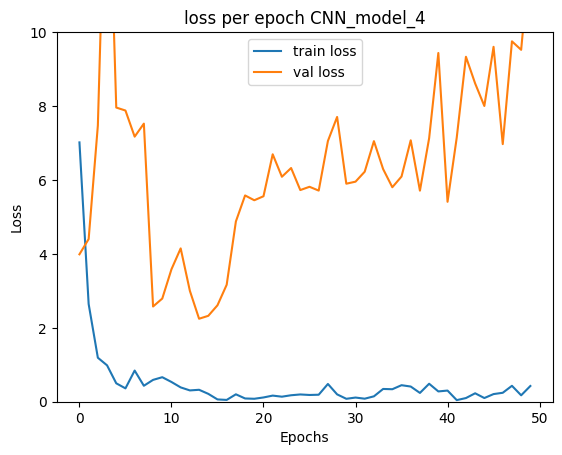

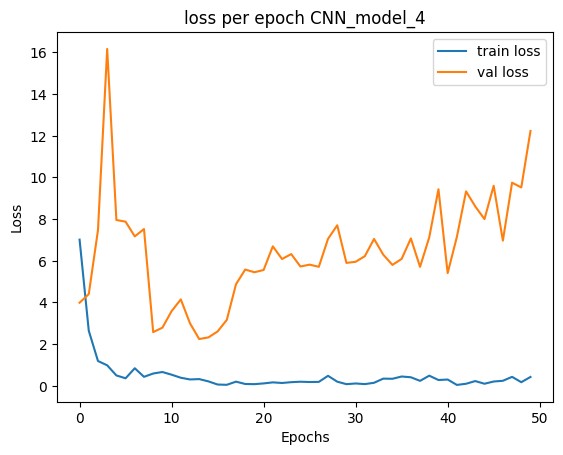

In [46]:
plt.plot(history4.history['loss'], label='train loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.ylim(0, 10)
plt.title('loss per epoch CNN_model_4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('loss per epoch for CNN_model_4' , dpi=100)
plt.show()

plt.plot(history4.history['loss'], label='train loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.title('loss per epoch CNN_model_4')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
#plt.savefig('loss per epoch for CNN_model_4' , dpi=100)
plt.show()

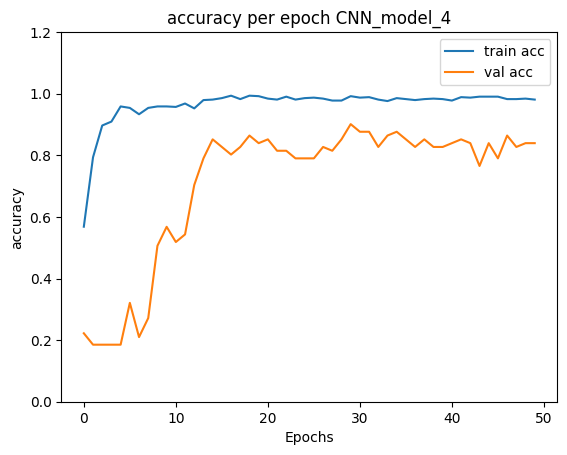

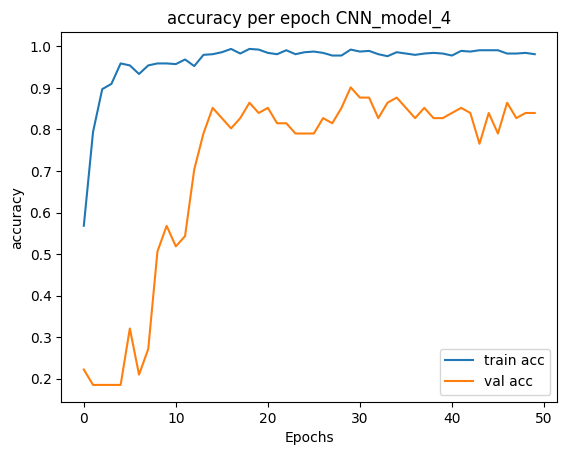

In [47]:
plt.plot(history4.history['accuracy'], label='train acc')
plt.plot(history4.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN_model_4')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch for CNN_model_4' , dpi=100)
plt.show()

plt.plot(history4.history['accuracy'], label='train acc')
plt.plot(history4.history['val_accuracy'], label='val acc')
plt.title('accuracy per epoch CNN_model_4')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch for CNN_model_4' , dpi=100)
plt.show()

In [48]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [51]:
ypred4 = CNN_model_4.predict(test_dataset , batch_size=16)
ypred_classes4 = np.argmax(ypred4, axis=1)
pred_label4 = np.argmax(CNN_model_4.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

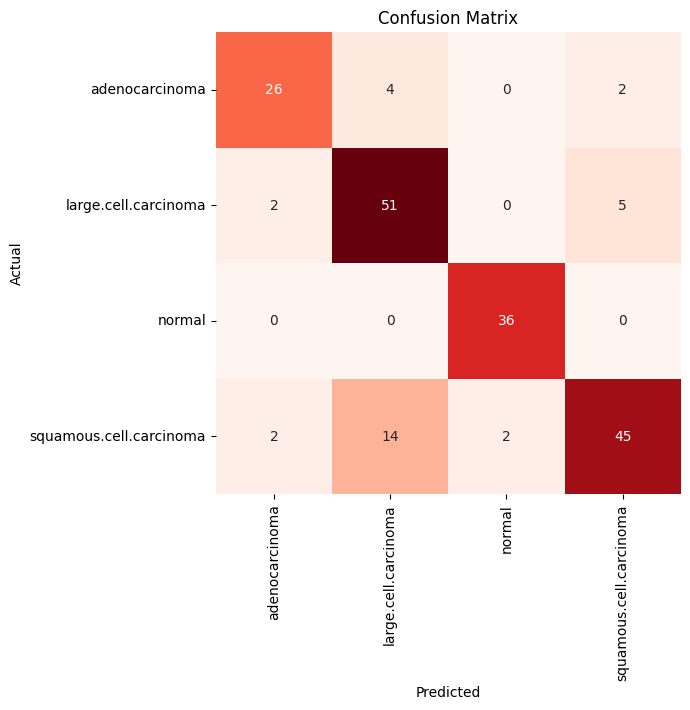

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.8667    0.8125    0.8387        32
   large.cell.carcinoma     0.7391    0.8793    0.8031        58
                 normal     0.9474    1.0000    0.9730        36
squamous.cell.carcinoma     0.8654    0.7143    0.7826        63

               accuracy                         0.8360       189
              macro avg     0.8546    0.8515    0.8494       189
           weighted avg     0.8425    0.8360    0.8347       189



In [50]:
cm = confusion_matrix(true_label, pred_label4 )
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label4, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

# CNN Using SVM as Final Layer

In [59]:
model_svm = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(3,3) ,activation='relu',padding='same', input_shape=(255, 255, 1)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(3,3) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(3,3) ,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    

  

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.01)),


   

  
])

In [60]:
model_svm.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [61]:
model_svm.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 85, 85, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 42, 42, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 128)       

In [63]:
history_svm = model_svm.fit(train_dataset, train_label,
            epochs = 100,
            batch_size=16,               
            validation_data = (validation_dataset , validation_label))

Epoch 1/100
40/40 [==============================] - 1s 36ms/step - loss: 1.3589 - accuracy: 0.3667 - val_loss: 1.3213 - val_accuracy: 0.4444
Epoch 2/100
40/40 [==============================] - 1s 27ms/step - loss: 1.2977 - accuracy: 0.4159 - val_loss: 1.2715 - val_accuracy: 0.4568
Epoch 3/100
40/40 [==============================] - 1s 27ms/step - loss: 1.2515 - accuracy: 0.4683 - val_loss: 1.2057 - val_accuracy: 0.4815
Epoch 4/100
40/40 [==============================] - 1s 27ms/step - loss: 1.2018 - accuracy: 0.5016 - val_loss: 1.1903 - val_accuracy: 0.4938
Epoch 5/100
40/40 [==============================] - 1s 27ms/step - loss: 1.1992 - accuracy: 0.4968 - val_loss: 1.1694 - val_accuracy: 0.5185
Epoch 6/100
40/40 [==============================] - 1s 27ms/step - loss: 1.1709 - accuracy: 0.5206 - val_loss: 1.1728 - val_accuracy: 0.5185
Epoch 7/100
40/40 [==============================] - 1s 27ms/step - loss: 1.1562 - accuracy: 0.5698 - val_loss: 1.1140 - val_accuracy: 0.6296
Epoch 

In [77]:
model_svm.save('C:/Users/Iman/Desktop/SVM')

INFO:tensorflow:Assets written to: C:/Users/Iman/Desktop/SVM\assets


In [54]:
model_svm = keras.models.load_model('C:/Users/Iman/Desktop/SVM')

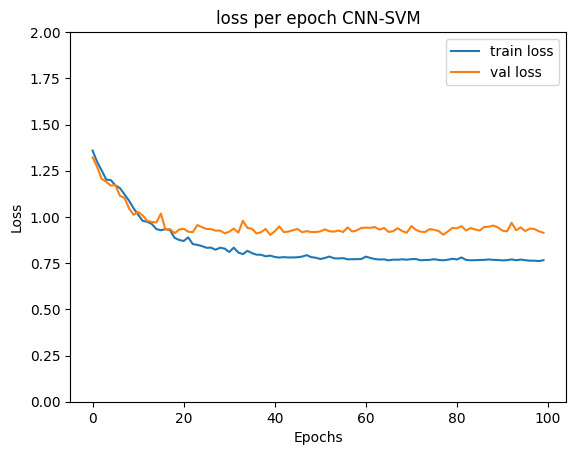

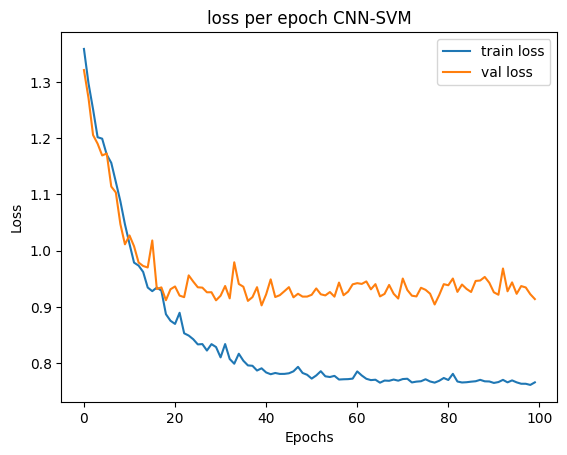

In [64]:
plt.plot(history_svm.history['loss'], label='train loss')
plt.plot(history_svm.history['val_loss'], label='val loss')
plt.ylim(0, 2)
plt.title('loss per epoch CNN-SVM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch CNN-SVM' , dpi=100)
plt.show()

plt.plot(history_svm.history['loss'], label='train loss')
plt.plot(history_svm.history['val_loss'], label='val loss')
plt.title('loss per epoch CNN-SVM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch CNN-SVM' , dpi=100)
plt.show()

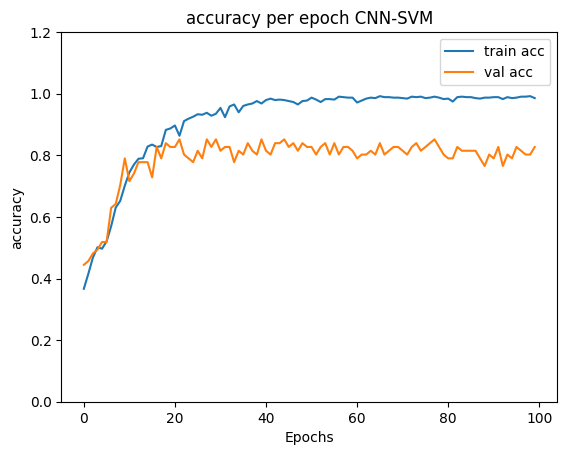

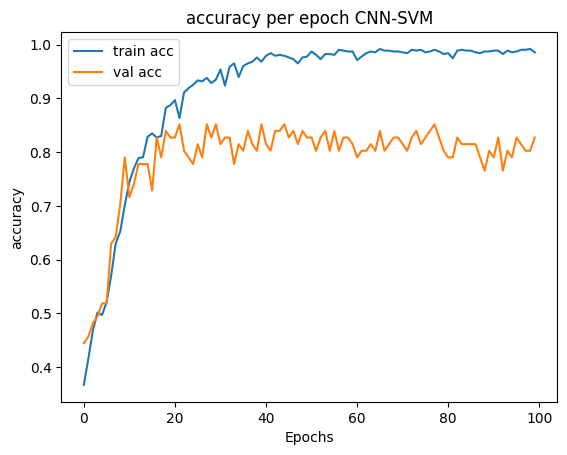

In [65]:
plt.plot(history_svm.history['accuracy'], label='train acc')
plt.plot(history_svm.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN-SVM')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy per epoch CNN-SVM' , dpi=100)
plt.show()

plt.plot(history_svm.history['accuracy'], label='train acc')
plt.plot(history_svm.history['val_accuracy'], label='val acc')
plt.title('accuracy per epoch CNN-SVM')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('accuracy per epoch CNN-SVM' , dpi=100)
plt.show()

In [9]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [56]:
ypred5 = model_svm.predict(test_dataset , batch_size=16)
ypred_classes5 = np.argmax(ypred5, axis=1)
pred_label5 = np.argmax(model_svm.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

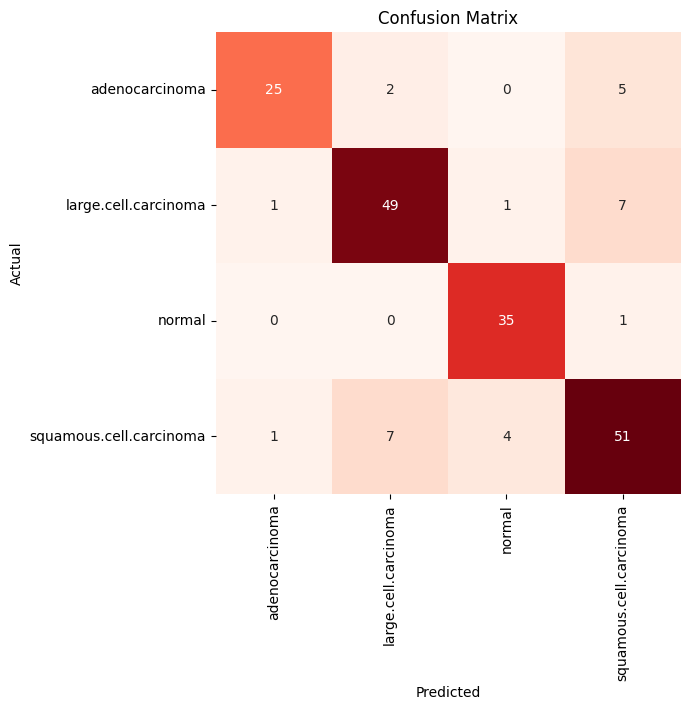

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     0.9259    0.7812    0.8475        32
   large.cell.carcinoma     0.8448    0.8448    0.8448        58
                 normal     0.8750    0.9722    0.9211        36
squamous.cell.carcinoma     0.7969    0.8095    0.8031        63

               accuracy                         0.8466       189
              macro avg     0.8607    0.8520    0.8541       189
           weighted avg     0.8483    0.8466    0.8459       189



In [67]:
cm = confusion_matrix(true_label, pred_label5 )
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label5, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

## CNN model (6) 

In [83]:
CNN_model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,activation='tanh',padding='same', input_shape=(255, 255, 1)), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Conv2D(128,(3,3) ,padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
 
    
    tf.keras.layers.Conv2D(256,(3,3) ,padding='same', activation='tanh'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.5),
  

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax' ),

   

  
])

In [84]:
CNN_model_6.compile(optimizer= 'SGD' , loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
CNN_model_6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_97 (Conv2D)          (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_98 (Conv2D)          (None, 127, 127, 64)      18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 conv2d_99 (Conv2D)          (None, 63, 63, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 128)     

In [86]:
history6 = CNN_model_6.fit(train_dataset, train_label,
            epochs = 50,
            batch_size=16,               
            validation_data = (validation_dataset , validation_label))

Epoch 1/50
40/40 [==============================] - 15s 355ms/step - loss: 1.2524 - accuracy: 0.4190 - val_loss: 1.1327 - val_accuracy: 0.5062
Epoch 2/50
40/40 [==============================] - 16s 392ms/step - loss: 1.0521 - accuracy: 0.4921 - val_loss: 1.3052 - val_accuracy: 0.4568
Epoch 3/50
40/40 [==============================] - 19s 483ms/step - loss: 0.8988 - accuracy: 0.6190 - val_loss: 1.0388 - val_accuracy: 0.6296
Epoch 4/50
40/40 [==============================] - 22s 552ms/step - loss: 0.8050 - accuracy: 0.6476 - val_loss: 0.8480 - val_accuracy: 0.6790
Epoch 5/50
40/40 [==============================] - 25s 619ms/step - loss: 0.7362 - accuracy: 0.7095 - val_loss: 0.7791 - val_accuracy: 0.6420
Epoch 6/50
40/40 [==============================] - 27s 681ms/step - loss: 0.6384 - accuracy: 0.7238 - val_loss: 0.7493 - val_accuracy: 0.7037
Epoch 7/50
40/40 [==============================] - 27s 681ms/step - loss: 0.5858 - accuracy: 0.7762 - val_loss: 0.7788 - val_accuracy: 0.6543

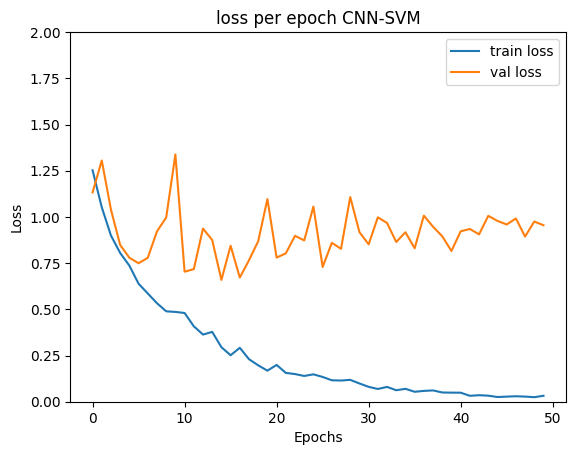

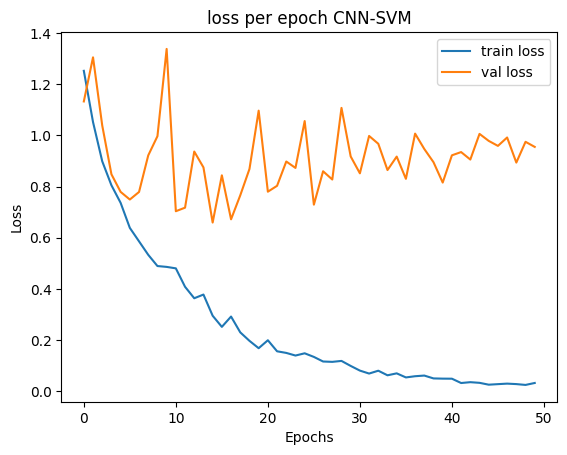

In [87]:
plt.plot(history6.history['loss'], label='train loss')
plt.plot(history6.history['val_loss'], label='val loss')
plt.ylim(0, 2)
plt.title('loss per epoch CNN-SVM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch CNN-6' , dpi=100)
plt.show()

plt.plot(history6.history['loss'], label='train loss')
plt.plot(history6.history['val_loss'], label='val loss')
plt.title('loss per epoch CNN-SVM')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss per epoch CNN-6' , dpi=100)
plt.show()

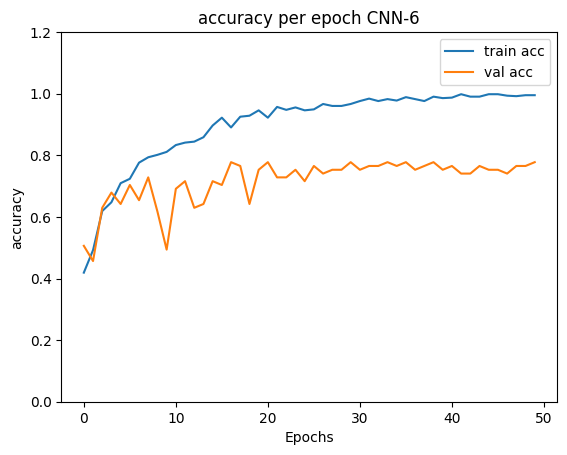

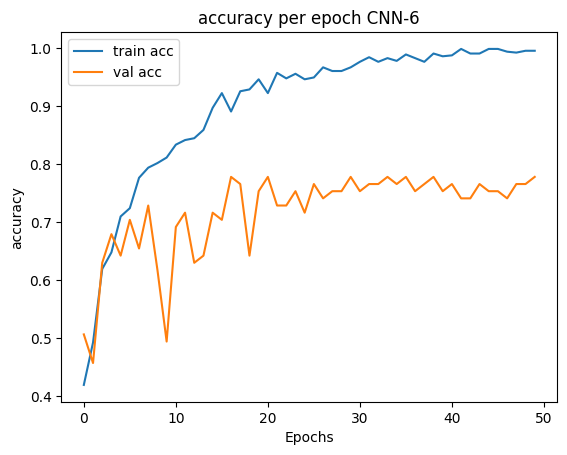

In [88]:
plt.plot(history6.history['accuracy'], label='train acc')
plt.plot(history6.history['val_accuracy'], label='val acc')
plt.ylim(0, 1.2)
plt.title('accuracy per epoch CNN-6')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch CNN-6' , dpi=100)
plt.show()

plt.plot(history6.history['accuracy'], label='train acc')
plt.plot(history6.history['val_accuracy'], label='val acc')
plt.title('accuracy per epoch CNN-6')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
#plt.savefig('accuracy per epoch CNN-6' , dpi=100)
plt.show()

In [89]:
class_labels = ['adenocarcinoma','large.cell.carcinoma' ,'normal', 'squamous.cell.carcinoma']

In [92]:
ypred6 = CNN_model_6.predict(test_dataset , batch_size=16)
ypred_classes6 = np.argmax(ypred6, axis=1)
pred_label6 = np.argmax(CNN_model_6.predict(test_dataset, batch_size=16),axis=1)
true_label = np.argmax(test_label,axis=1)

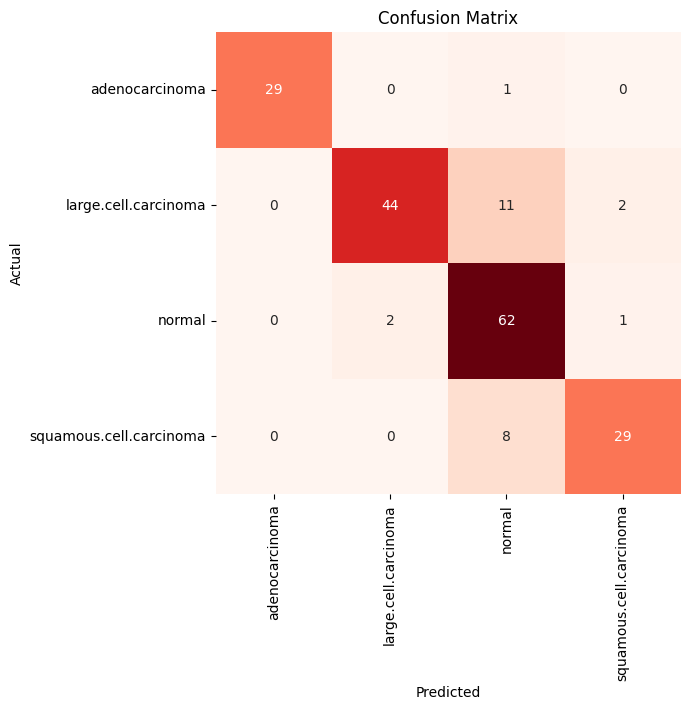

Classification Report:
----------------------
                          precision    recall  f1-score   support

         adenocarcinoma     1.0000    0.9667    0.9831        30
   large.cell.carcinoma     0.9565    0.7719    0.8544        57
                 normal     0.7561    0.9538    0.8435        65
squamous.cell.carcinoma     0.9062    0.7838    0.8406        37

               accuracy                         0.8677       189
              macro avg     0.9047    0.8691    0.8804       189
           weighted avg     0.8847    0.8677    0.8684       189



In [93]:
cm = confusion_matrix(true_label, pred_label6)
# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap= 'Reds', cbar=False)       
plt.xticks(np.arange(4)+.5, class_labels, rotation=90)
plt.yticks(np.arange(4)+.5, class_labels, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
clr = classification_report(true_label, pred_label6, target_names=class_labels, digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

In [95]:
n_classes = 4 

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_label[:, i], ypred6[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["adenocarcinoma"], tpr["adenocarcinoma"], _ = roc_curve(test_label.ravel(), ypred6.ravel())
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

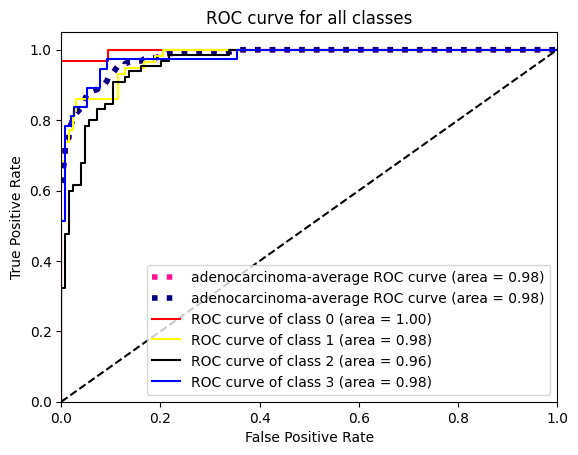

In [96]:
from itertools import cycle
lw = 1.5
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["adenocarcinoma"] = all_fpr
tpr["adenocarcinoma"] = mean_tpr
roc_auc["adenocarcinoma"] = auc(fpr["adenocarcinoma"], tpr["adenocarcinoma"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["adenocarcinoma"], tpr["adenocarcinoma"],
         label='adenocarcinoma-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["adenocarcinoma"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red', 'yellow', 'black' , 'blue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for all classes')
plt.legend(loc='lower right')
plt.show()